In [1]:
import numpy as np
import argparse
import cv2
import os
import time
from keras.models import load_model
from collections import deque
import matplotlib.pyplot as plt

IMG_SIZE = 96
ColorChannels = 3

def print_results(video, limit=None):
        fig=plt.figure(figsize=(16, 30))
        
        print("Loading model ...")
        model = load_model('./violence.h5')
        Q = deque(maxlen=128)
        
        vidcap = cv2.VideoCapture(video)
        (W, H) = (None, None)
        count = 0

        while True:
                (grabbed, frame) = vidcap.read()
                ID = vidcap.get(1)
                if not grabbed:
                    break
                try:
                    if (ID % 6 == 0):
                        count = count + 1
                        n_frames = len(frame)
                        
                        if W is None or H is None:
                            (H, W) = frame.shape[:2]

                        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                        output = cv2.resize(frame, (512, 360)).copy()
                        frame = cv2.resize(frame, (96, 96)).astype("float32")
                        frame = frame.reshape(IMG_SIZE, IMG_SIZE, ColorChannels) / 255
                        preds = model.predict(np.expand_dims(frame, axis=0))[0]
                        Q.append(preds)

                        results = np.array(Q).mean(axis=0)
                        i = (preds > 0.56)[0] #np.argmax(results)
                        label = i
                        text = "Violence: {}".format(label)

                        color = (0, 255, 0)
                        if label:
                            color = (255, 0, 0) 
                        else:
                            color = (0, 255, 0)

                        cv2.putText(output, text, (35, 50), cv2.FONT_HERSHEY_SIMPLEX,
                                1, color, 3)

                        fig.add_subplot(8, 3, count)
                        plt.imshow(output)

                    if limit and count > limit:
                        break
                except:
                    break 
        plt.show()
        vidcap.release()

In [2]:
from IPython.display import HTML
from base64 import b64encode

def play(filename):
    html = ''
    video = open(filename,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html += '<video width=640 muted controls autoplay loop><source src="%s" type="video/mp4"></video>' % src 
    return HTML(html)

In [3]:
Violence='./violence/Real Life Violence Dataset\Violence/V_909.mp4'
play(Violence)

Loading model ...


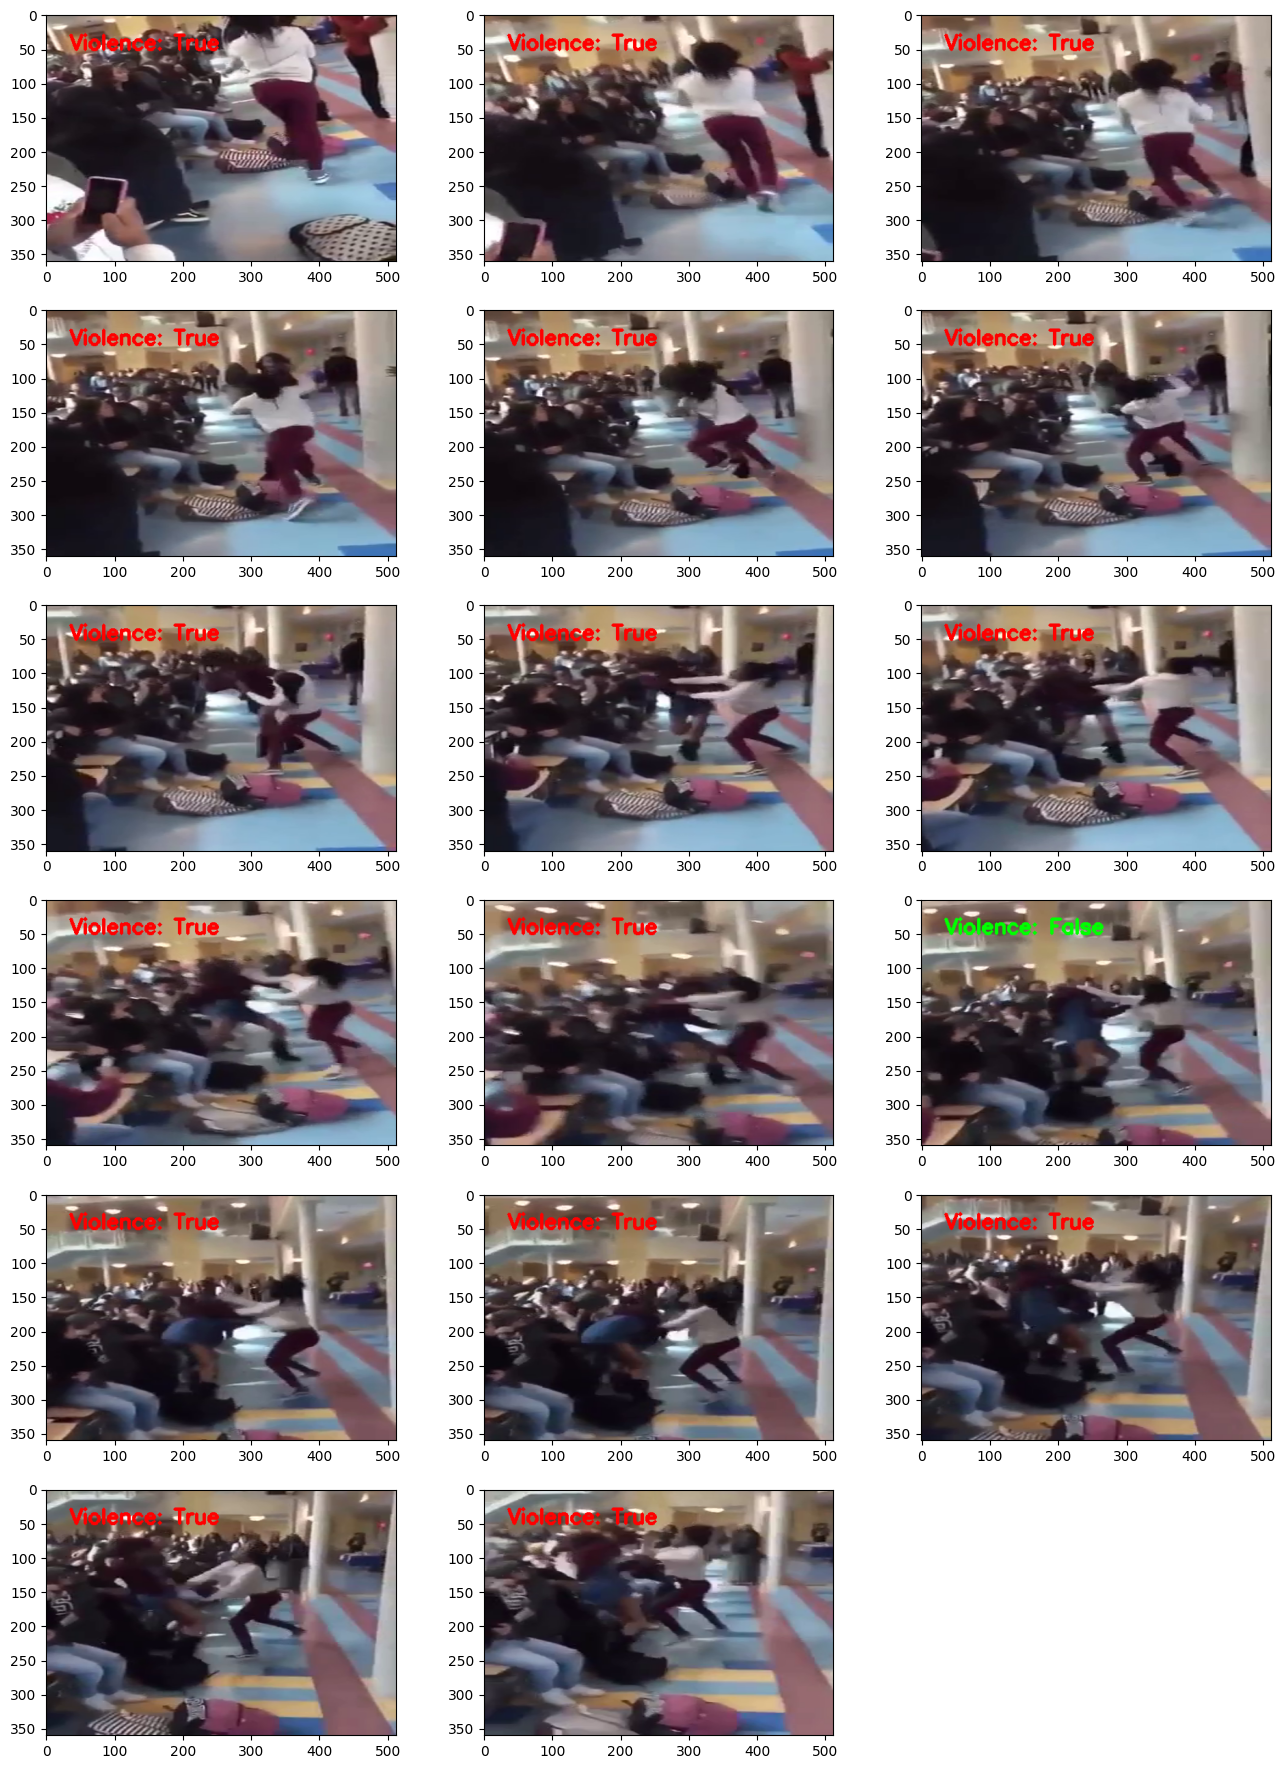

In [4]:
print_results(Violence, limit=30)

Loading model ...


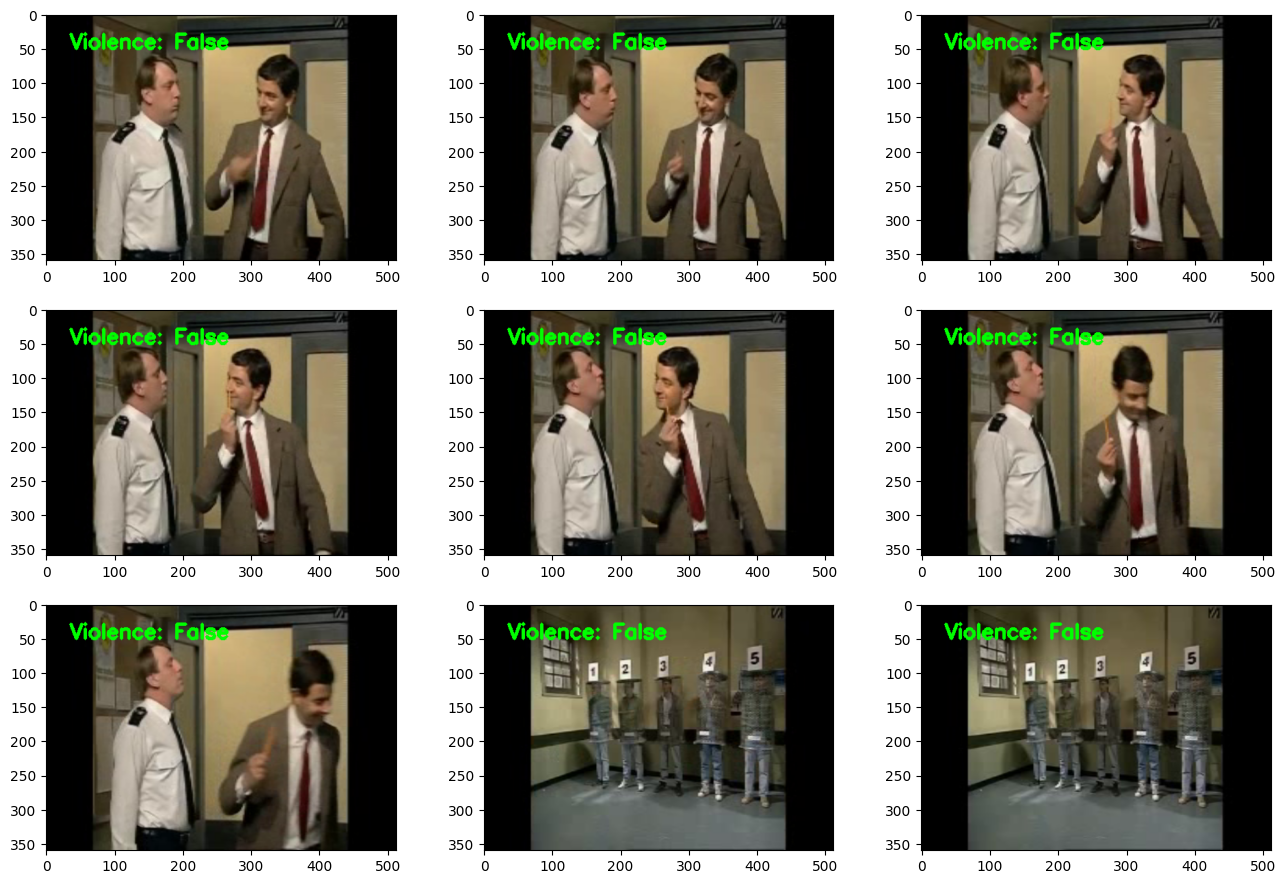

In [5]:
NonViolence='./violence/Real Life Violence Dataset/NonViolence/NV_447.mp4'
print_results(NonViolence, limit=30)